----
## **<font color="crimson"> Ya ok </font>**

In [1]:
pip install xarray

  Using cached xarray-2025.4.0-py3-none-any.whl.metadata (12 kB)
Using cached xarray-2025.4.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install toolz

  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5netcdf 

  Using cached h5netcdf-1.6.1-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.6.1-py3-none-any.whl (49 kB)
Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cfgrib

  Using cached cfgrib-0.9.15.0-py3-none-any.whl.metadata (55 kB)
  Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (14 kB)
  Using cached findlibs-0.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached cfgrib-0.9.15.0-py3-none-any.whl (48 kB)
Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl (7.4 MB)
Using cached findlibs-0.1.1-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import xarray as xr
import numpy as np
import datetime
import pandas as pd
import cftime
import cftime

### **<font color="Purple"> Datos de HadGEM3 </font>**

##### **<font color="olive"> CAOs </font>**

##### **<font color="olive"> Geopotencial </font>**

In [32]:
gph_file = '../datasetsok/zg500_AERday_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19790101-20141230.nc'

In [33]:
gph_ds19=xr.open_dataset(gph_file)
gphds19 = gph_ds19['zg500']
gphds19

<xarray.DataArray 'zg500' (time: 12960, lat: 144, lon: 192)> Size: 1GB
[358318080 values with dtype=float32]
Coordinates:
  * time     (time) object 104kB 1979-01-01 12:00:00 ... 2014-12-30 12:00:00
  * lat      (lat) float64 1kB -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    plev     float64 8B ...
Attributes:
    standard_name:  geopotential_height
    long_name:      Geopotential Height at 500hPa
    comment:        geopotential height on the 500 hPa surface
    units:          m
    original_name:  mo: (stash: m01s30i297, blev: 500.0, lbproc: 128) / (stas...
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-20T04:16:25Z altered by CMOR: Treated scalar dime...

In [12]:
gphds19 = gphds19s.sel(lat=slice(15,60),lon=slice(180,290)) #coords son 0-360°, necesito 70W-180W
# gphds19

In [13]:
gph_climday2 = gphds19s.groupby('time.dayofyear').mean(dim='time')

In [14]:
gphclimdaysuav2 = gph_climday2.rolling(dayofyear=5, center=True, min_periods=1).mean()

In [15]:
anomaliasday2 = gphds19s.groupby('time.dayofyear') - gphclimdaysuav2

In [16]:
anomaliasday2["time"] = anomaliasday2.time.dt.floor("D")

In [17]:
anomaliasday2

<xarray.DataArray 'zg500' (time: 12960, lat: 144, lon: 192)> Size: 1GB
array([[[-14.900391  , -14.824219  , -14.746582  , ..., -15.121582  ,
         -15.049316  , -14.976074  ],
        [-16.388184  , -16.16211   , -15.921387  , ..., -17.035645  ,
         -16.810547  , -16.596191  ],
        [-15.664551  , -15.281738  , -14.847168  , ..., -16.838379  ,
         -16.432617  , -16.044434  ],
        ...,
        [250.47607   , 250.60938   , 250.76025   , ..., 250.16504   ,
         250.25195   , 250.35596   ],
        [259.02295   , 259.16162   , 259.30908   , ..., 258.6245    ,
         258.7544    , 258.88623   ],
        [260.8037    , 260.8628    , 260.9214    , ..., 260.6206    ,
         260.68213   , 260.7422    ]],

       [[-58.271484  , -58.20166   , -58.124023  , ..., -58.444336  ,
         -58.393555  , -58.336426  ],
        [-63.08789   , -62.86621   , -62.62207   , ..., -63.762207  ,
         -63.560547  , -63.323242  ],
        [-68.94922   , -68.31787   , -67.61035   , ..., -70.453125  ,
         -70.061035  , -69.543945  ],
...
        [204.65527   , 207.23242   , 209.72949   , ..., 196.5498    ,
         199.29834   , 202.00879   ],
        [189.73486   , 191.06738   , 192.39648   , ..., 185.71484   ,
         187.04346   , 188.38965   ],
        [185.84473   , 186.18945   , 186.55176   , ..., 184.7998    ,
         185.14062   , 185.48633   ]],

       [[-10.43457   , -10.26709   , -10.120117  , ..., -10.916016  ,
         -10.761719  , -10.615234  ],
        [ -6.5664062 ,  -6.0947266 ,  -5.633789  , ...,  -7.9697266 ,
          -7.5249023 ,  -7.0561523 ],
        [ -1.0893555 ,  -0.3828125 ,   0.37304688, ...,  -3.0703125 ,
          -2.4394531 ,  -1.7861328 ],
        ...,
        [139.42871   , 139.7832    , 140.06104   , ..., 137.88184   ,
         138.47461   , 138.99268   ],
        [104.32422   , 104.30664   , 104.27637   , ..., 104.234375  ,
         104.27344   , 104.30908   ],
        [ 85.81641   ,  85.7168    ,  85.635254  , ...,  86.058105  ,
          85.975586  ,  85.890625  ]]], dtype=float32)
Coordinates:
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    plev       (time) float64 104kB 5e+04 5e+04 5e+04 ... 5e+04 5e+04 5e+04
    dayofyear  (time) int64 104kB 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
  * time       (time) object 104kB 1979-01-01 00:00:00 ... 2014-12-30 00:00:00

In [18]:
gph_std = gphds19.std(dim='time')

In [19]:
norm = anomaliasday2/gph_std

<div align="center">

##### <font color="darkorange"> PNA = Z * (15°N-25°N, 180-140°W) - Z * (40°N-50°N, 180-140°W) + Z * (45°N-60°N, 125°W-105°W) - Z * (25°N-35°N, 90°W-70°W) </font>

</div>


In [20]:
PNA_1 = norm.sel(lat=slice(15,25),lon=slice(180,220))
PNA_2 = norm.sel(lat=slice(40,50),lon=slice(180,220))
PNA_3 = norm.sel(lat=slice(45,60),lon=slice(235,255))
PNA_4 = norm.sel(lat=slice(25,35),lon=slice(270,290))

In [21]:
weights = np.cos(np.deg2rad(norm.lat))
weights.name = "weights"

PNA1_weighted = PNA_1.weighted(weights)
PNA1 = PNA1_weighted.mean(dim=["lon", "lat"])

PNA2_weighted = PNA_2.weighted(weights)
PNA2 = PNA2_weighted.mean(dim=["lon", "lat"])

PNA3_weighted = PNA_3.weighted(weights)
PNA3 = PNA3_weighted.mean(dim=["lon", "lat"])

PNA4_weighted = PNA_4.weighted(weights)
PNA4 = PNA4_weighted.mean(dim=["lon", "lat"])

In [22]:
PNAidxHG = PNA1 - PNA2 + PNA3 - PNA4

In [23]:
PNAidxHG_smooth=PNAidxHG.rolling(time=4,min_periods=1).mean()

In [24]:
PNAidxHG.mean()

<xarray.DataArray 'zg500' ()> Size: 8B
array(0.00029305)

In [25]:
import matplotlib.pyplot as plt

In [26]:
PNAidxHG_DJF = PNAidxHG_smooth.sel(time=PNAidxHG_smooth['time'].dt.month.isin([12, 1, 2]))

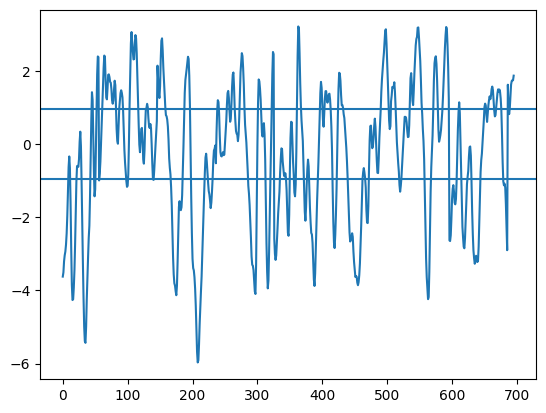

In [27]:
plt.plot(PNAidxHG_DJF.isel(time=slice(4,700)))
#plt.plot(PNAidxHG.isel(time=slice(4,300)))
#plt.fill_between(PNAidxHG.isel(time=slice(4,200)).time,-float(PNAidxHG_DJF.std()/2),float(PNAidxHG_DJF.std()/2),color='gray',alpha=0.5)
plt.axhline(-float(PNAidxHG_DJF.std()/2))
plt.axhline(float(PNAidxHG_DJF.std()/2))

In [28]:
def CAOs_PNA(fecha_csv_path, PNAidxHG_smooth,thr=0.5):
    """
    Relaciona fechas de CAO con la fase del índice PNA (calendario 360_day).
    Ajusta fechas con días 31 a 30 para que sean válidas en el calendario.

    Parámetros:
    - fecha_csv_path: ruta al CSV con columna 'fecha'.
    - PNAidxHG_smooth: DataArray con índice PNA en calendario 360_day.

    Retorna:
    - Diccionario con listas de CAOs por fase del PNA.
    """

    # Leer CSV
    df = pd.read_csv(fecha_csv_path, parse_dates=['fecha'])

    # Ajustar fechas al calendario 360_day (días 31 se convierten en 30)
    fechas_CAO = []
    for fecha in df['fecha']:
        day = fecha.day if fecha.day <= 30 else 30
        fechas_CAO.append(
            cftime.Datetime360Day(fecha.year, fecha.month, day)
        )

    # Clasificar
    PNApCAO = []
    PNAnCAO = []
    PNA0CAO = []

    for fecha in fechas_CAO:
        print(fecha)
        if fecha in PNAidxHG_smooth.time.values:
            valor = PNAidxHG_smooth.sel(time=fecha).item()
            if valor >= thr:
                PNApCAO.append({'fecha': fecha, 'PNAidx': valor})
            elif valor <= -thr:
                PNAnCAO.append({'fecha': fecha, 'PNAidx': valor})
            elif -thr <= valor <= thr:
                PNA0CAO.append({'fecha': fecha, 'PNAidx': valor})
            if fecha.day > 30:
                print(f"Cambiando {fecha} a día 30 para compatibilidad 360_day")

    return {'PNAyCAOS':fechas_CAO,
            'PNApCAO': PNApCAO, 
            'PNAnCAO': PNAnCAO, 
            'PNA0CAO': PNA0CAO
           }


In [44]:
PNAconcatCAO_HG = CAOs_PNA('../datasetsok/fechasCAOs_HG.csv', PNAidxHG_DJF,thr=PNAidxHG_DJF.std()/2)

1983-01-25 00:00:00
1983-01-26 00:00:00
1983-01-27 00:00:00
2003-01-18 00:00:00
1981-12-21 00:00:00
1981-12-22 00:00:00
1996-01-12 00:00:00
1996-01-13 00:00:00
2003-01-19 00:00:00
1979-01-12 00:00:00
1979-01-13 00:00:00
1979-01-14 00:00:00
1999-01-04 00:00:00
1999-01-05 00:00:00
2011-12-18 00:00:00
2011-12-19 00:00:00
1995-01-09 00:00:00
1995-01-10 00:00:00
1989-02-10 00:00:00
1989-02-11 00:00:00
2010-12-17 00:00:00
2010-12-18 00:00:00
2010-12-19 00:00:00
1989-02-22 00:00:00
1989-02-23 00:00:00
1995-01-25 00:00:00
1995-01-26 00:00:00
2007-02-07 00:00:00
2013-12-15 00:00:00
2003-12-20 00:00:00
2003-12-21 00:00:00
2003-12-22 00:00:00
2013-12-16 00:00:00
2013-12-17 00:00:00
2013-12-18 00:00:00
2013-12-19 00:00:00
1991-01-19 00:00:00
1991-01-20 00:00:00
2008-01-26 00:00:00
2008-01-27 00:00:00
2011-01-15 00:00:00
2011-01-16 00:00:00
2011-01-17 00:00:00
2011-01-18 00:00:00
2013-12-29 00:00:00
2013-12-30 00:00:00
2004-01-11 00:00:00
2004-01-12 00:00:00
2014-01-01 00:00:00
2014-01-02 00:00:00


In [45]:
print(f'Cantidad de CAOs en HadHEM3: {len(PNAconcatCAO_HG["PNAyCAOS"])}')
print(f'Cantidad de CAOs en fase positiva: {len(PNAconcatCAO_HG["PNApCAO"])}')
print(f'Cantidad de CAOs en fase negativa: {len(PNAconcatCAO_HG["PNAnCAO"])}')
print(f'Cantidad de CAOs en fase neutra: {len(PNAconcatCAO_HG["PNA0CAO"])}')

Cantidad de CAOs en HadHEM3: 62
Cantidad de CAOs en fase positiva: 16
Cantidad de CAOs en fase negativa: 17
Cantidad de CAOs en fase neutra: 29
